In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_dir = "/content/drive/MyDrive/Sayem_Potato_Leaf_/PlantVillage2/Training"
val_dar = "/content/drive/MyDrive/Sayem_Potato_Leaf_/PlantVillage2/Validation"

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  # validation_split=0.25,
  # subset="training",
  # seed=123,
  image_size=(128,128),
  batch_size=64)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dar,
  # validation_split=0.25,
  # subset="validation",
  # seed=123,
  image_size=(128,128),
  batch_size=64
  )

Found 3251 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
dense = DenseNet121(input_shape = (128, 128, 3), weights = 'imagenet', include_top = False)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
for layer in dense.layers:
    layer.trainable = False

x = Flatten()(dense.output)
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=dense.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']      

In [ ]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 10, batch_size = 64,
                    shuffle=True)

Epoch 1/10
51/51 [==============================] - 491s 8s/step - loss: 5.5014 - accuracy: 0.6287 - val_loss: 1.7137 - val_accuracy: 0.7548
Epoch 2/10
51/51 [==============================] - 226s 4s/step - loss: 0.8160 - accuracy: 0.8560 - val_loss: 0.8316 - val_accuracy: 0.8389
Epoch 3/10
51/51 [==============================] - 226s 4s/step - loss: 0.6044 - accuracy: 0.8782 - val_loss: 1.1422 - val_accuracy: 0.8317
Epoch 4/10
51/51 [==============================] - 209s 4s/step - loss: 0.3649 - accuracy: 0.9151 - val_loss: 0.6125 - val_accuracy: 0.8702
Epoch 5/10
51/51 [==============================] - 224s 4s/step - loss: 0.2941 - accuracy: 0.9240 - val_loss: 0.4524 - val_accuracy: 0.8894
Epoch 6/10
51/51 [==============================] - 208s 4s/step - loss: 0.3758 - accuracy: 0.9126 - val_loss: 0.7245 - val_accuracy: 0.8462
Epoch 7/10
51/51 [==============================] - 226s 4s/step - loss: 0.2104 - accuracy: 0.9409 - val_loss: 0.6769 - val_accuracy: 0.8630
Epoch 8/10
51

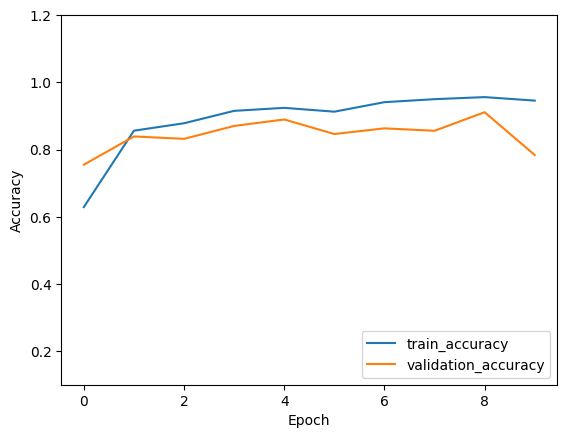

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.2])
plt.legend(loc='lower right')

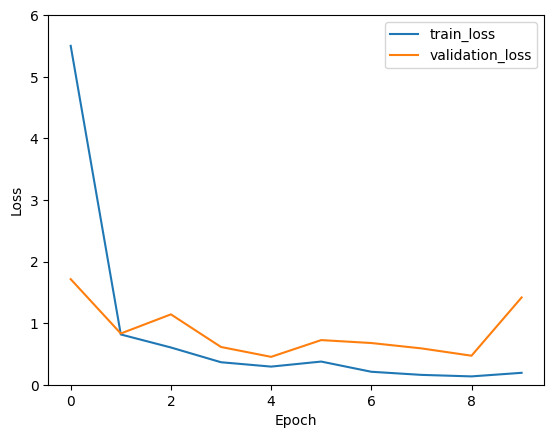

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 6])
plt.legend(loc='upper right')

1/1 [==============================] - 1s 1s/step


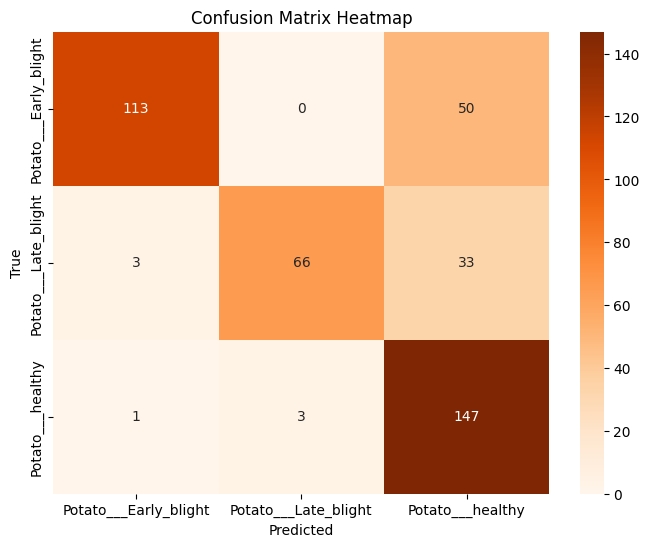

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

all_val_labels = []
all_val_predictions = []

# Evaluate the model on the validation dataset batch by batch
for batch in val_ds:
    val_images, val_labels_batch = batch
    val_predictions_batch = model.predict(val_images)

    val_labels_batch = np.array(val_labels_batch)
    val_predictions_batch = np.argmax(val_predictions_batch, axis=-1)

    all_val_labels.extend(val_labels_batch)
    all_val_predictions.extend(val_predictions_batch)

# Calculate the confusion matrix for all validation data
conf_matrix = confusion_matrix(all_val_labels, all_val_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
print(classification_report(all_val_labels, all_val_predictions, target_names=class_names))

                       precision    recall  f1-score   support

Potato___Early_blight       0.97      0.69      0.81       163
 Potato___Late_blight       0.96      0.65      0.77       102
     Potato___healthy       0.64      0.97      0.77       151

             accuracy                           0.78       416
            macro avg       0.85      0.77      0.78       416
         weighted avg       0.84      0.78      0.79       416

